In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

In [9]:
df_raw = pd.read_csv('D:/results_bender/german_classify/classifications_train.csv')
feats = pd.read_csv('feats.csv', sep=';')

df = df_raw[['fileID', 'speaker', 'label']]
feats = feats[['Sampa', 'Quartett', 'Frequenz', 'Biphon_1', 'Biphon_2', 'Onset_Art', 'Onset_Ort', 'Onset_Sti', 'Coda_Art', 'Coda_Ort', 'Coda_Sti']]

feats.columns = ['label', 'Quartett', 'Frequenz', 'Biphon_1', 'Biphon_2', 'Onset_Art', 'Onset_Ort', 'Onset_Sti', 'Coda_Art', 'Coda_Ort', 'Coda_Sti']

df = df.merge(feats, on='label')

In [10]:
df.head()

,fileID,speaker,label,Quartett,Frequenz,Biphon_1,Biphon_2,Onset_Art,Onset_Ort,Onset_Sti,Coda_Art,Coda_Ort,Coda_Sti
0,de2_e_b01_v0102301011111,v01,zUN,1,HF,zU,UN,Frik,Alv,+,Nas,Vel,+
1,de2_e_b01_v0102301011112,v01,zUN,1,HF,zU,UN,Frik,Alv,+,Nas,Vel,+
2,de2_e_b01_v0102301011113,v01,zUN,1,HF,zU,UN,Frik,Alv,+,Nas,Vel,+
3,de2_e_b01_v0102301011114,v01,zUN,1,HF,zU,UN,Frik,Alv,+,Nas,Vel,+
4,de2_e_b01_v0102301011115,v01,zUN,1,HF,zU,UN,Frik,Alv,+,Nas,Vel,+


In [11]:
df_raw.head()

,index,fileID,start,end,speaker,label,d1,d2,d3,d4,...,Yl,Yr,1,2,3,4,5,6,7,8
0,0,de2_e_b01_v0102301011111,563.5,1482.766,v01,zUN,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
1,0,de2_e_b01_v0102301011112,710.7,1486.803,v01,zUN,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,de2_e_b01_v0102301011113,470.8,1487.483,v01,zUN,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,0,de2_e_b01_v0102301011114,524.4,1485.488,v01,zUN,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
4,0,de2_e_b01_v0102301011115,668.1,1489.569,v01,zUN,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [198]:
len(df_raw)

7822

In [64]:
alv = mpatches.Patch(label='Alveolar', color="tab:blue")
bilab = mpatches.Patch(label='Bilabial', color="tab:orange")
labdent = mpatches.Patch(label='Labiodental', color="tab:green")
postalv = mpatches.Patch(label='Postalveolar', color="tab:red")
uvul = mpatches.Patch(label='Uvular', color="tab:purple")
vel = mpatches.Patch(label='Velar', color="tab:brown")
pal = mpatches.Patch(label='Palatal', color="tab:pink")

onset_ort_labels = [alv, bilab, labdent, postalv, uvul, vel]
coda_ort_labels = [alv, bilab, uvul, vel, pal]

onset_art_labels = ["Frikativ", "Nasal", "Plosiv", "Trill"]
coda_art_labels = ["Frikativ", "Lateral", "Nasal", "Trill"]

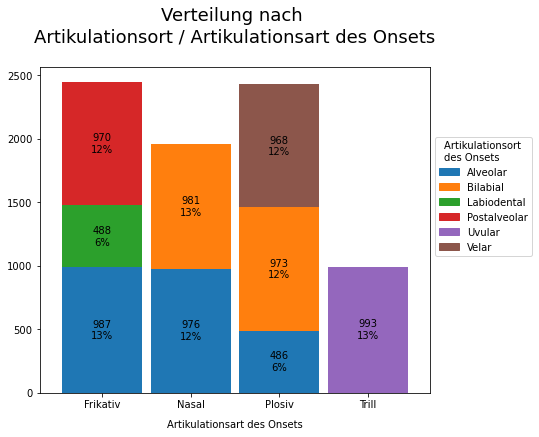

In [253]:
ax = pd.crosstab(df.Onset_Art, df.Onset_Ort)

fig = ax.plot.bar(stacked=True, figsize=(7,6), width=0.9)

plt.legend(title='Artikulationsort \ndes Onsets', handles = onset_ort_labels, loc='upper left', bbox_to_anchor=(1.0,0.8))
plt.title("Verteilung nach \nArtikulationsort / Artikulationsart des Onsets", fontsize=18, pad=25.0, ha="center")

plt.xlabel("Artikulationsart des Onsets", labelpad=10.0)
plt.xticks(ticks=np.arange(4), labels=onset_art_labels, rotation=0)

## Annotate Values:
for art_row in ax.itertuples():
    for item_ix in range(len(art_row)):
        if type(art_row[item_ix]) == int and art_row[item_ix] != 0 :
            x = ax.index.get_loc(art_row[0])
            
            if item_ix==1:
                y = art_row[item_ix]/2
            else:
                y = 0
                for item in art_row[1:item_ix]:
                    y += item
        
                y += (art_row[item_ix]/2)
            text = str(art_row[item_ix]) + "\n" + "{0:.0%}".format(art_row[item_ix]/7822)
            plt.text(x, y, text, ha="center", va="center")
            
plt.savefig("data_by_onset_articulation.jpg", bbox_inches = 'tight')
            

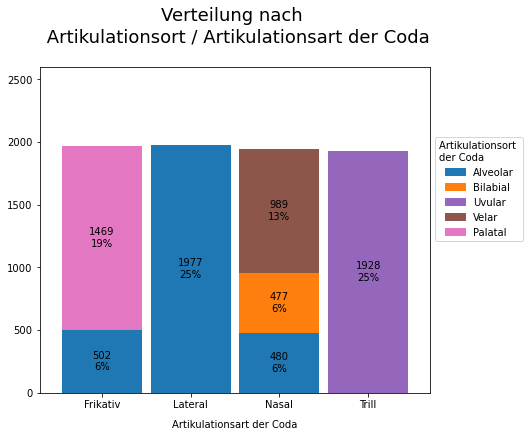

In [252]:
ax = pd.crosstab(df.Coda_Art, df.Coda_Ort)

ax.plot.bar(stacked=True, figsize=(7,6), width=0.9, color=["tab:blue", "tab:orange", "tab:pink", "tab:purple", "tab:brown"])

plt.legend(title='Artikulationsort \nder Coda', handles=coda_ort_labels, loc='upper left', bbox_to_anchor=(1.0,0.8))
plt.title("Verteilung nach \n Artikulationsort / Artikulationsart der Coda", fontsize=18, pad=25.0, ha="center")

plt.xlabel("Artikulationsart der Coda", labelpad=10.0)
plt.xticks(ticks=np.arange(len(coda_art_labels)), labels=coda_art_labels, rotation=0)

plt.ylim(0,2600)

## Annotate Values:
for art_row in ax.itertuples():
    for item_ix in range(len(art_row)):
        if type(art_row[item_ix]) == int and art_row[item_ix] != 0 :
            x = ax.index.get_loc(art_row[0])
            
            if item_ix==1:
                y = art_row[item_ix]/2
            else:
                y = 0
                for item in art_row[1:item_ix]:
                    y += item
        
                y += (art_row[item_ix]/2)
            text = str(art_row[item_ix]) + "\n" + "{0:.0%}".format(art_row[item_ix]/7822)
            plt.text(x, y, text, ha="center", va="center")
plt.savefig("data_by_coda_articulation.jpg", bbox_inches = 'tight')